<a href="https://colab.research.google.com/github/crakcode/ML_Fintech/blob/main/Lecture_StrategyFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 정제

###  주가 데이터 병합

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
os.chdir("/content/drive/MyDrive/금융특화 계층별 AI역량강화 교안/실습1_5. 웹 크롤링과 금융 데이터/01.  재무제표 기반 투자 전략")

#### 데이터 불러오기

In [ ]:
import pandas as pd
from tqdm import tqdm 

data = pd.read_csv("../데이터/주요재무지표.csv", encoding = "euc-kr")
data.drop(['자산총계', '부채총계', '자본총계', '매출액', '영업이익', '당기순이익'],
          axis = 1, inplace = True)

In [ ]:
stock_info_data = pd.read_csv("../데이터/종목정보.txt", sep = "\t", encoding = "euc-kr")
settle_month_dict = stock_info_data.set_index('Name')['SettleMonth']
settle_month_dict = settle_month_dict.apply(lambda x:int(x[:-1])).to_dict()

In [ ]:

sub_due_data = pd.read_csv("../데이터/사업보고서_제출마감일.csv", encoding ="euc-kr")
sub_due_dict = sub_due_data.set_index(['결산월', '사업연도'])['제출마감일'].to_dict()

In [ ]:
sp_data_dict = dict()
for stock in tqdm(data['기업'].unique()):
    if stock + ".csv" in os.listdir("../데이터/주가데이터"):
        sp_data = pd.read_csv("../데이터/주가데이터/" + stock + ".csv",
                              usecols = ["Date", "Close"],
                              parse_dates = ["Date"])
        sp_data_dict[stock] = sp_data    

100%|██████████| 2352/2352 [01:46<00:00, 22.04it/s]


#### 데이터 병합

In [ ]:
def find_closest_stock_price(sp_data, date):
    date = pd.to_datetime(date) # 날짜 자료형으로 변환
    # 주가 데이터를 벗어나는 범위의 날짜가 입력되면 결측을 반환
    if sp_data['Date'].max() < date: 
        return np.nan
    else:
        while True:
            # date와 같은 날짜가 Date에 있으면
            if sum(sp_data['Date'] == date) > 0: 
                # 해당 날짜의 종가를 저장
                value = sp_data.loc[sp_data['Date'] == date, 'Close'].iloc[0]  
                break
            else: # date와 같은 날짜의 Date가 없으면, 하루 증가
                date += pd.to_timedelta(1, 'D')
        return value

In [ ]:
import numpy as np

cur_sp_list = [] # 현재 주가
next_sp_list = [] # 미래 주가

for corp, year in data[['기업', '연도']].values:
    print(corp, year)
    if corp not in sp_data_dict.keys(): # 데이터가 없으면
        cur_sp_list.append(np.nan)
        next_sp_list.append(np.nan)
    else:
        try:
            # 주가 데이터 및 결산월 가져오기
            sp_data = sp_data_dict[corp]
            settle_month = settle_month_dict[corp]
            # 현재 주가 탐색 및 추가
        
            cur_date = sub_due_dict[settle_month, year] 
            cur_sp = find_closest_stock_price(sp_data, cur_date)
            cur_sp_list.append(cur_sp)
        except:
            cur_sp_list.append(np.nan)
        # 미래 주가 탐색 및 추가 
        try:
            next_date = sub_due_dict[settle_month, year+1]
            next_sp = find_closest_stock_price(sp_data, next_date)
            next_sp_list.append(next_sp)
        except:
            next_sp_list.append(np.nan)
        
data['현재_주가'] = cur_sp_list
data['미래_주가'] = next_sp_list

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
주성엔지니어링 2015
주성엔지니어링 2016
주성엔지니어링 2017
주성엔지니어링 2018
주성엔지니어링 2018
주성엔지니어링 2019
주성엔지니어링 2020
주연테크 2013
주연테크 2014
주연테크 2015
주연테크 2016
주연테크 2017
주연테크 2018
주연테크 2018
주연테크 2019
주연테크 2020
줌인터넷 2013
줌인터넷 2014
줌인터넷 2015
줌인터넷 2016
줌인터넷 2017
줌인터넷 2018
줌인터넷 2018
줌인터넷 2019
줌인터넷 2020
중앙디앤엠 2013
중앙디앤엠 2014
중앙디앤엠 2015
중앙디앤엠 2016
중앙디앤엠 2017
중앙디앤엠 2018
중앙디앤엠 2019
중앙디앤엠 2020
중앙백신 2013
중앙백신 2014
중앙백신 2015
중앙백신 2016
중앙백신 2017
중앙백신 2018
중앙백신 2019
중앙백신 2020
중앙에너비스 2013
중앙에너비스 2014
중앙에너비스 2015
중앙에너비스 2016
중앙에너비스 2017
중앙에너비스 2018
중앙에너비스 2019
중앙에너비스 2020
지나인제약 2013
지나인제약 2014
지나인제약 2015
지나인제약 2016
지나인제약 2017
지나인제약 2018
지나인제약 2019
지나인제약 2020
지노믹트리 2013
지노믹트리 2014
지노믹트리 2015
지노믹트리 2016
지노믹트리 2017
지노믹트리 2018
지노믹트리 2018
지노믹트리 2019
지노믹트리 2020
지놈앤컴퍼니 2013
지놈앤컴퍼니 2014
지놈앤컴퍼니 2015
지놈앤컴퍼니 2016
지놈앤컴퍼니 2017
지놈앤컴퍼니 2018
지놈앤컴퍼니 2018
지놈앤컴퍼니 2019
지놈앤컴퍼니 2020
지누스 2013
지누스 2014
지누스 2015
지누스 2016
지누스 2017
지누스 2018
지누스 2019
지누스 2020
지니너스 2013
지니너스 2014
지니너스 2015
지니너스 2016
지니너스 2017
지니너스 2018
지니

### 배당금 및 PER 데이터 병합

#### 데이터 불러오기 및 확인

In [ ]:
div_data = pd.read_csv("../데이터/배당금.csv", encoding = "euc-kr")
PER_data = pd.read_csv("../데이터/PER.csv", encoding = "euc-kr")

In [ ]:
display(div_data.head())
display(PER_data.head())

,stock_name,2013,2014,2015,2016,2017,2018,2019,2020
0,3S,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,AJ네트웍스,0.0,0.0,0.0,60.0,86.0,100.0,300.0,210.0
2,AK홀딩스,200.0,350.0,500.0,550.0,650.0,750.0,750.0,400.0
3,APS홀딩스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AP시스템,NaN,NaN,NaN,0.0,0.0,150.0,50.0,120.0


,2013,2014,2015,2016,2017,2018,2019,2020,stock_name
0,NaN,NaN,NaN,43.313253,11.047619,78.970588,84.375,100.833333,3S
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AJ네트웍스
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK홀딩스
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APS홀딩스
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP시스템


#### 데이터 구조 변환

In [ ]:
year_col_list = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
div_data = div_data.melt(id_vars = ['stock_name'], value_vars = year_col_list)
display(div_data.head())

,stock_name,variable,value
0,3S,2013,NaN
1,AJ네트웍스,2013,0.0
2,AK홀딩스,2013,200.0
3,APS홀딩스,2013,0.0
4,AP시스템,2013,NaN


In [ ]:
div_data.rename({"stock_name":"기업", "variable":"연도", "value":"배당금"},
                 axis = 1, inplace = True)
div_data['연도'] = div_data['연도'].astype(int)

In [ ]:
PER_data = PER_data.melt(id_vars = ['stock_name'], value_vars = year_col_list)
PER_data.rename({"stock_name":"기업", "variable":"연도", "value":"PER"},
                            axis = 1, inplace = True)
PER_data['연도'] = PER_data['연도'].astype(int)

#### 데이터 병합

In [ ]:
data = pd.merge(data, div_data, on = ['기업', '연도'], how = "left")
data = pd.merge(data, PER_data, on = ['기업', '연도'], how = "left")

#### 데이터 내보내기

In [ ]:
display(data.head())

,기업,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER
0,3S,2013,70.612320,NaN,NaN,NaN,적자전환,적자전환,적자전환,1.036271,NaN,6100.0,4350.0,NaN,NaN
1,3S,2014,60.288336,-11.687845,173.179128,114.728018,흑자지속,적자전환,적자전환,-6.675781,-10.489496,4350.0,2535.0,NaN,NaN
2,3S,2015,56.323967,-24.352916,38.894997,14.974005,흑자지속,적자지속,적자지속,-8.312107,-13.836280,2535.0,3595.0,NaN,NaN
3,3S,2016,59.923676,2.240210,453.409466,-64.511098,흑자지속,흑자전환,적자지속,-5.893767,-9.383155,3595.0,2320.0,0.0,43.313253
4,3S,2017,54.331315,10.359573,148.592592,61.341308,흑자지속,적자전환,적자지속,-16.392325,-27.605322,2320.0,2685.0,0.0,11.047619


In [ ]:
data.to_csv("../데이터/재무제표_분석용데이터.csv", index = False, encoding = "euc-kr")

# 이익 상태

### 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir("/content/drive/MyDrive/금융특화 계층별 AI역량강화 교안/실습1_5. 웹 크롤링과 금융 데이터/01.  재무제표 기반 투자 전략")

In [ ]:
import pandas as pd
cols = ["기업", "연도", "현재_주가", "미래_주가", "영업이익_상태", "당기순이익_상태"]
data = pd.read_csv("../데이터/재무제표_분석용데이터.csv",
                   usecols = cols,
                   encoding="euc-kr")

In [ ]:
data.dropna(inplace = True)

### 환경 설정

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

### 데이터 탐색 및 시각화

#### 상태 변수 분포 확인

In [ ]:
display(data['영업이익_상태'].value_counts(normalize = True))

흑자지속    0.693309
적자지속    0.120818
흑자전환    0.096654
적자전환    0.089219
Name: 영업이익_상태, dtype: float64

In [ ]:
display(data['당기순이익_상태'].value_counts(normalize = True))

흑자지속    0.611524
적자지속    0.185874
흑자전환    0.105948
적자전환    0.096654
Name: 당기순이익_상태, dtype: float64

#### 상태에 따른 수익률 시각화

In [ ]:
data['수익률'] = (data['미래_주가'] - data['현재_주가']) / data['현재_주가'] * 100

Text(0, 0.5, '수익률')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


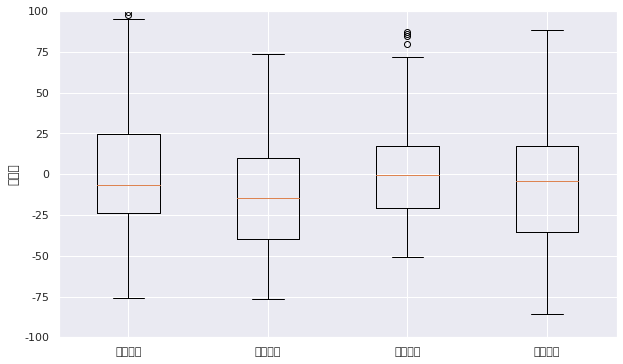

In [ ]:
# 영업이익 상태에 따른 수익률 시각화
plt.figure(figsize = (10, 6))
graph_data = []
for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
    value = data.loc[data["영업이익_상태"] == state, "수익률"]
    graph_data.append(value)
plt.boxplot(graph_data)
plt.ylim(-100, 100)
plt.xticks([1, 2, 3, 4], ["흑자지속", "적자지속", "흑자전환", "적자전환"])
plt.ylabel("수익률")

Text(0, 0.5, '수익률')

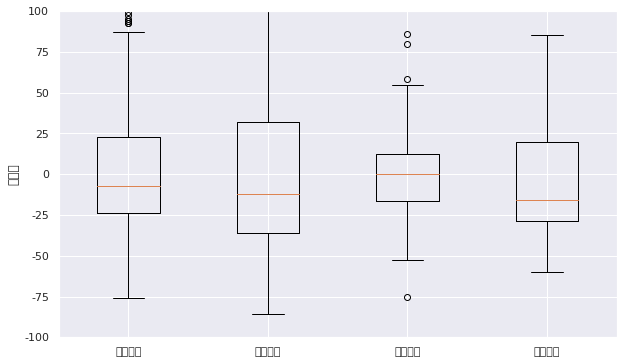

In [ ]:
# 당기순이익 상태에 따른 수익률 시각화
plt.figure(figsize = (10, 6))
graph_data = []
for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
    value = data.loc[data["당기순이익_상태"] == state, "수익률"]
    graph_data.append(value)
plt.boxplot(graph_data)
plt.ylim(-100, 100)
plt.xticks([1, 2, 3, 4], ["흑자지속", "적자지속", "흑자전환", "적자전환"])
plt.ylabel("수익률")

#### 상태에 따른 수익률 통계량 확인

In [ ]:
display(data.groupby(['영업이익_상태'])['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
영업이익_상태,,,,,,,,
적자전환,48.0,12.96,88.04,-85.90,-35.32,-3.90,17.31,413.44
적자지속,65.0,21.66,134.42,-76.62,-39.96,-14.37,10.06,796.77
흑자전환,52.0,19.36,83.92,-50.83,-20.82,-0.76,17.33,481.66
흑자지속,373.0,8.34,63.57,-75.62,-23.77,-6.80,24.45,653.93


In [ ]:
display(data.groupby(['당기순이익_상태'])['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
당기순이익_상태,,,,,,,,
적자전환,52.0,16.32,86.69,-60.23,-28.81,-15.61,19.57,413.44
적자지속,100.0,23.26,122.06,-85.90,-36.04,-12.18,32.08,796.77
흑자전환,57.0,13.56,59.00,-75.55,-16.17,0.34,12.60,223.34
흑자지속,329.0,6.68,63.46,-75.62,-23.83,-7.52,22.80,653.93


### 동일 가중 교체 매매 방법에 따른 수익 비교

#### 영업이익 상태 기준

In [ ]:
result = []
for year in range(2014, 2020):
    y_data = data.loc[data['연도'] == year]
    for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
        # 영업이익 상태와 연도에 따른 수익률 정의 
        ror_list = y_data.loc[data["영업이익_상태"] == state, "수익률"]
        inve_per_stock = 10 ** 8 / len(ror_list) # 종목별 투자금 계산
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, state, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "상태", "수익률"]) 

Text(0.5, 0, '연도')

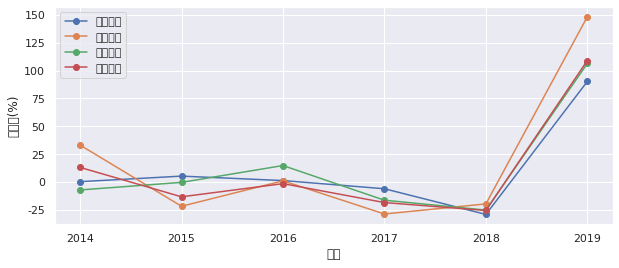

In [ ]:
plt.figure(figsize = (10, 4))
for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
    graph_data = result.loc[(result['상태'] ==  state), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = state)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률(%)")
plt.xlabel("연도")

In [ ]:
display(result.groupby('상태')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
상태,,,,,,,,
적자전환,6.0,10.64,50.08,-25.45,-17.06,-7.28,9.55,109.01
적자지속,6.0,18.80,67.29,-28.59,-21.14,-9.20,25.19,148.28
흑자전환,6.0,12.11,48.18,-25.10,-13.94,-3.64,11.08,106.40
흑자지속,6.0,10.41,40.99,-28.98,-4.39,0.89,4.37,90.26


#### 당기순이익 상태 기준

In [ ]:
result = []
for year in range(2014, 2020):
    y_data = data.loc[data['연도'] == year]
    for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
        # 당기순이익 상태와 연도에 따른 수익률 정의 
        ror_list = y_data.loc[data["당기순이익_상태"] == state, "수익률"]
        inve_per_stock = 10 ** 8 / len(ror_list) # 종목별 투자금 계산
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, state, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "상태", "수익률"]) 

Text(0.5, 0, '연도')

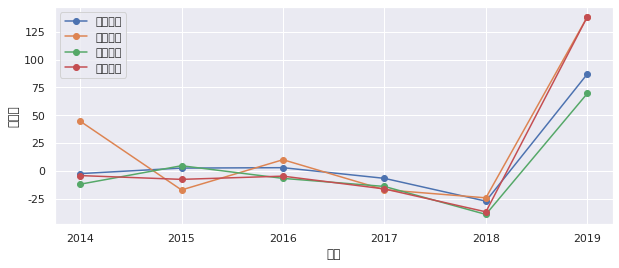

In [ ]:
plt.figure(figsize = (10, 4))
for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
    graph_data = result.loc[(result['상태'] ==  state), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = state)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [ ]:
display(result.groupby('상태')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
상태,,,,,,,,
적자전환,6.0,11.56,63.41,-36.72,-13.99,-6.10,-4.27,138.56
적자지속,6.0,22.56,62.28,-24.14,-17.01,-3.37,36.12,138.50
흑자전환,6.0,0.48,36.82,-39.04,-13.41,-9.29,1.87,69.68
흑자지속,6.0,9.43,39.65,-27.12,-5.57,0.10,2.86,87.15


# 부채비율, 매출 및 이익 증가율

### 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir("/content/drive/MyDrive/금융특화 계층별 AI역량강화 교안/실습1_5. 웹 크롤링과 금융 데이터/01.  재무제표 기반 투자 전략")

In [ ]:
import pandas as pd
data = pd.read_csv("../데이터/재무제표_분석용데이터.csv", encoding="euc-kr")
data.drop(['ROA', 'ROE', '배당금', 'PER'], axis = 1, inplace = True)
data['수익률'] = (data['미래_주가'] - data['현재_주가']) / data['현재_주가'] * 100
data.dropna(inplace = True)

### 환경 설정

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rcParams['font.family'] = 'Nanum Brush Script'
sns.set()
%matplotlib inline
# rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

### 수익률과의 상관관계 확인

#### 부채비율

(-100.0, 100.0)

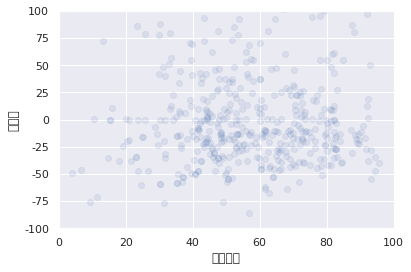

In [ ]:
plt.scatter(data['부채비율'], data['수익률'], alpha = 0.1)
plt.xlabel("부채비율")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)

In [ ]:
display(data.corr().round(4))

,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,현재_주가,미래_주가,수익률
연도,1.0000,-0.0211,0.0294,0.0424,0.0195,-0.0578,-0.0380,0.2159
부채비율,-0.0211,1.0000,0.0224,0.0221,0.0175,-0.0681,-0.0681,-0.0214
매출액증가율,0.0294,0.0224,1.0000,0.1938,0.0164,-0.0092,0.0167,0.0576
영업이익증가율,0.0424,0.0221,0.1938,1.0000,0.0022,0.0007,0.0114,0.0177
당기순이익증가율,0.0195,0.0175,0.0164,0.0022,1.0000,-0.0149,-0.0122,0.0241
현재_주가,-0.0578,-0.0681,-0.0092,0.0007,-0.0149,1.0000,0.9114,-0.0878
미래_주가,-0.0380,-0.0681,0.0167,0.0114,-0.0122,0.9114,1.0000,0.0453
수익률,0.2159,-0.0214,0.0576,0.0177,0.0241,-0.0878,0.0453,1.0000


#### 매출액 증가율

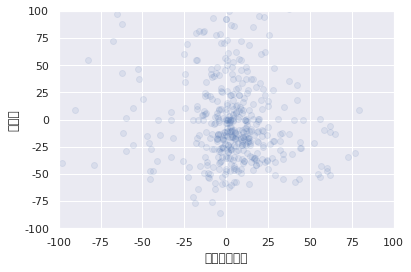

0.0534


In [ ]:
temp = data.loc[data['매출액_상태'] == "흑자지속", ['매출액증가율', '수익률']]
plt.scatter(temp['매출액증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("매출액증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()
print(temp.corr().loc['매출액증가율', '수익률'].round(4))

#### 영업이익 증가율

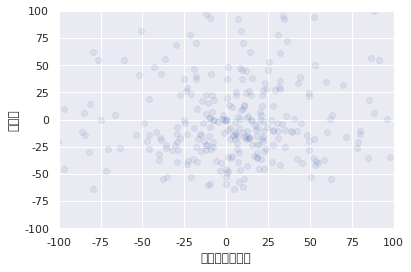

0.0516


In [ ]:
temp = data.loc[data['영업이익_상태'] == "흑자지속", ['영업이익증가율', '수익률']]
plt.scatter(temp['영업이익증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("영업이익증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()
print(temp.corr().loc['영업이익증가율', '수익률'].round(4))

#### 당기순이익 증가율

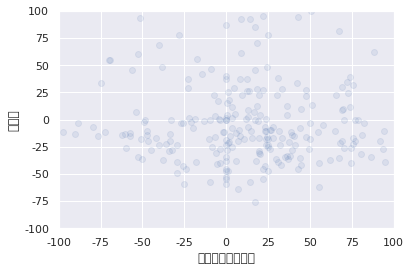

0.0374


In [ ]:
temp = data.loc[data['당기순이익_상태'] == "흑자지속", ['당기순이익증가율', '수익률']]
plt.scatter(temp['당기순이익증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("당기순이익증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()
print(temp.corr().loc['당기순이익증가율', '수익률'].round(4))

### 동일 가중 교체 매매에 따른 수익 비교

#### qcut 함수

In [ ]:
group = pd.qcut(data['부채비율'], 10)
display(group.value_counts(normalize = True).sort_index())

(-11.12, 31.612]    0.101732
(31.612, 41.303]    0.099567
(41.303, 45.994]    0.099567
(45.994, 50.916]    0.099567
(50.916, 55.989]    0.099567
(55.989, 62.609]    0.099567
(62.609, 68.974]    0.099567
(68.974, 75.118]    0.099567
(75.118, 82.085]    0.099567
(82.085, 95.642]    0.101732
Name: 부채비율, dtype: float64

In [ ]:
group = pd.qcut(data['부채비율'], 10, labels = range(1, 11)).astype(int)
display(group.head(10))

1      6
2      6
3      6
4      5
5      6
6      7
50     3
51     4
52     4
53    10
Name: 부채비율, dtype: int64

#### 부채 비율

In [ ]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year), ['부채비율', '수익률']]
    group_list = pd.qcut(temp['부채비율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

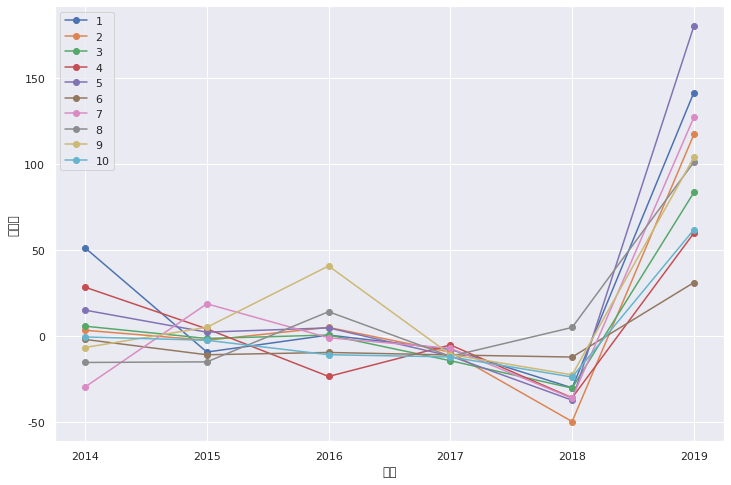

In [ ]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [ ]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,24.27,63.46,-30.18,-9.00,-3.66,38.47,141.41
2,6.0,10.58,55.91,-49.75,-7.72,0.36,4.52,117.02
3,6.0,7.21,39.48,-30.34,-11.18,-0.49,4.35,83.33
4,6.0,4.55,35.03,-35.95,-18.98,-0.59,22.24,59.73
5,6.0,25.45,77.82,-37.37,-8.23,3.42,12.39,179.94
6,6.0,-2.50,16.82,-12.29,-11.04,-10.29,-3.95,31.00
7,6.0,11.90,59.77,-36.22,-24.06,-4.15,13.71,126.97
8,6.0,12.92,44.76,-15.43,-14.27,-3.47,11.77,100.95
9,6.0,18.18,47.15,-22.65,-9.81,-0.86,31.73,103.67


#### 매출액 증가율

In [ ]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year) & (data['매출액_상태'] == "흑자지속"),
                    ['매출액증가율', '수익률']]
    group_list = pd.qcut(temp['매출액증가율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

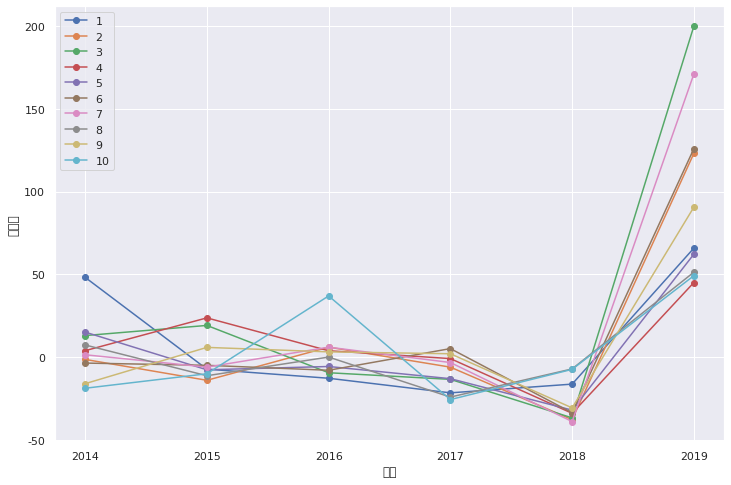

In [ ]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [ ]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,9.36,37.62,-21.57,-15.42,-10.01,34.33,65.84
2,6.0,11.66,56.62,-37.75,-12.01,-3.71,4.18,123.08
3,6.0,28.76,86.20,-36.69,-12.43,1.80,17.62,199.90
4,6.0,6.95,26.40,-33.93,0.31,3.88,18.76,45.05
5,6.0,3.16,32.62,-32.01,-11.67,-6.65,9.92,62.18
6,6.0,13.50,56.59,-33.61,-7.18,-4.27,2.97,125.90
7,6.0,21.71,74.85,-38.90,-5.34,-0.91,4.87,171.01
8,6.0,2.70,26.08,-24.13,-10.20,-3.53,5.52,51.31
9,6.0,9.17,42.30,-30.65,-11.51,2.61,5.21,90.59


#### 영업이익 증가율

In [ ]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year) & (data['영업이익_상태'] == "흑자지속"),
                    ['영업이익증가율', '수익률']]
    group_list = pd.qcut(temp['영업이익증가율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

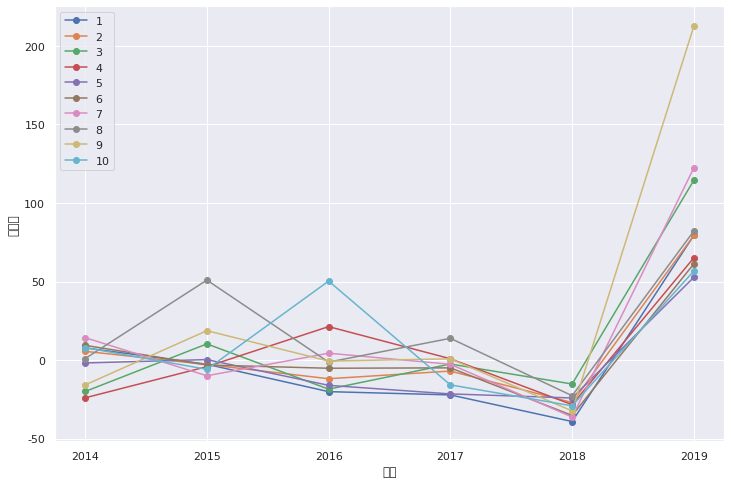

In [ ]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [ ]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,0.52,41.96,-39.12,-21.66,-11.39,5.15,79.43
2,6.0,6.02,37.51,-27.03,-10.66,-4.92,3.46,79.32
3,6.0,11.41,51.78,-20.01,-17.70,-8.88,7.09,114.45
4,6.0,5.11,34.47,-28.40,-19.07,-1.67,16.18,65.11
5,6.0,-1.77,28.52,-24.12,-20.18,-8.97,-0.24,52.70
6,6.0,3.69,31.82,-35.23,-5.15,-4.05,6.25,61.27
7,6.0,15.35,55.17,-36.26,-8.17,0.84,11.79,122.42
8,6.0,20.64,38.71,-22.69,-0.74,7.39,41.64,82.15
9,6.0,30.54,90.79,-32.35,-12.02,0.09,14.23,212.51


#### 당기순이익 증가율

In [ ]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year) & (data['당기순이익_상태'] == "흑자지속"),
                    ['당기순이익증가율', '수익률']]
    group_list = pd.qcut(temp['당기순이익증가율'], 5, labels = range(1, 6)).astype(int)
    for group in range(1, 6):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

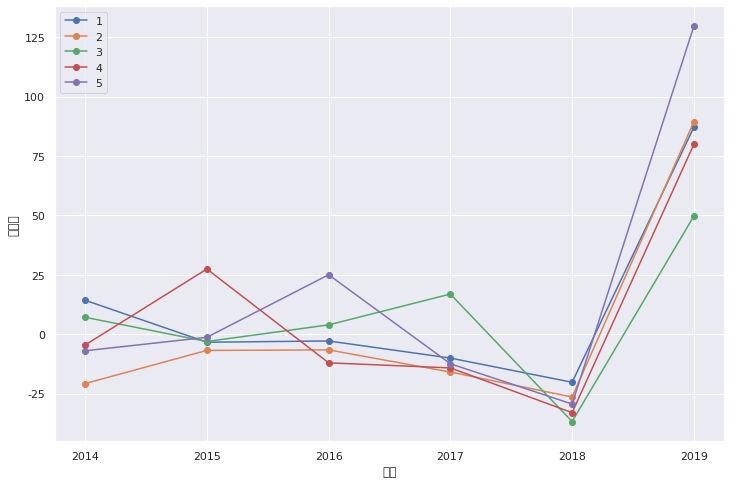

In [ ]:
plt.figure(figsize = (12, 8))
for group in range(1, 6):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [ ]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,10.82,39.03,-20.22,-8.37,-3.10,10.01,87.10
2,6.0,2.15,43.45,-26.42,-19.55,-11.36,-6.65,89.42
3,6.0,6.31,28.08,-36.74,-1.31,5.53,14.46,49.70
4,6.0,7.27,40.69,-33.01,-13.64,-8.29,19.45,79.91
5,6.0,17.43,57.74,-29.38,-11.06,-4.13,18.45,129.61


# 배당금

### 환경 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir("/content/drive/MyDrive/금융특화 계층별 AI역량강화 교안/실습1_5. 웹 크롤링과 금융 데이터/01.  재무제표 기반 투자 전략")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False 

### 데이터 준비

In [ ]:
import pandas as pd
data = pd.read_csv("../데이터/재무제표_분석용데이터.csv",
                   encoding = "euc-kr",
                   usecols = ['기업', '연도', '현재_주가', '미래_주가', '배당금'])

In [ ]:
import numpy as np
# 미래_배당금 및 배당유무 컬럼 추가
data.rename({"배당금":"현재_배당금"}, axis = 1, inplace = True)
data['미래_배당금'] = np.nan
data['미래_배당금'].iloc[:-1] = data['현재_배당금'].iloc[1:]
data.loc[data['연도'] == 2020, '미래_배당금'] = np.nan
data['배당유무'] = (data['현재_배당금'] > 0)
data.dropna(inplace = True)

### 데이터 탐색 및 시각화

#### 배당 비율 시각화

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


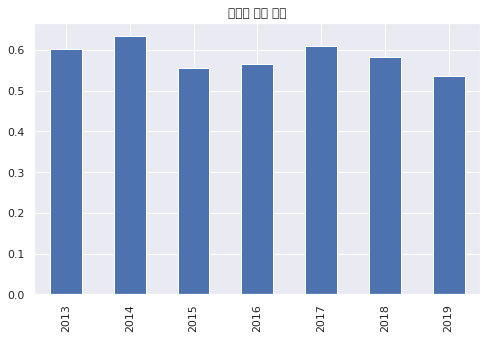

In [ ]:
num_div = data.groupby('연도')['배당유무'].sum() 
num_corp = data['연도'].value_counts()
div_ratio = num_div / num_corp
div_ratio.plot(kind = "bar", figsize = (8, 5), title = "배당한 기업 비율")

#### 배당 유무에 따른 수익률 비교

In [ ]:
data['수익률'] = (data['미래_주가'] - data['현재_주가']) / data['현재_주가'] * 100

In [ ]:
display(data.groupby(['연도', '배당유무'])['수익률'].describe().round(2))

count    mean     std    min    25%    50%     75%     max
연도   배당유무                                                             
2013 False   25.0   26.34  100.35 -48.82 -20.59  -4.15   21.64  413.44
     True    38.0   15.42   46.06 -34.85 -10.37   6.76   27.50  223.34
2014 False   23.0   -3.00   47.89 -75.55 -33.40 -12.81   12.82  110.93
     True    40.0    4.76   33.69 -42.81 -17.67  -3.84   35.27   80.41
2015 False   28.0   -4.90   25.38 -49.59 -21.04  -6.63   10.63   48.06
     True    35.0    5.04   45.13 -27.69 -13.71  -6.69    2.96  236.99
2016 False   30.0   14.30   71.10 -46.16 -26.05   0.88   22.71  334.00
     True    39.0   -4.53   27.15 -75.62 -17.33  -9.38   11.38   84.71
2017 False   27.0  -17.14   26.43 -93.39 -34.42 -16.29    3.25   27.50
     True    42.0   -7.49   27.37 -43.05 -23.40 -14.15    0.14   78.09
2018 False   36.0  -19.37   50.34 -71.06 -49.12 -30.37   -9.82  210.78
     True    50.0  -29.30   25.95 -63.98 -48.68 -36.66   -9.13   37.10
2019 False   32.0  128.85  201.59 -85.90   6.69  70.57  170.18  796.77
     True    37.0   81.88   74.77 -29.48  40.63  62.20   97.55  381.20

#### 주가 대비 배당 비율에 따른 수익률 비교

In [ ]:
data['배당금/주가'] = data['현재_배당금'] / data['현재_주가']

In [ ]:
data["배당금/주가 그룹"] = 0
for year in range(2013, 2020):
    idx = data.loc[(data["연도"] == year) & (data["배당유무"])].index
    data.loc[idx, "배당금/주가 그룹"] = pd.qcut(
        data.loc[idx, "배당금/주가"], 4, labels=[1, 2, 3, 4]
    ).astype(int)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


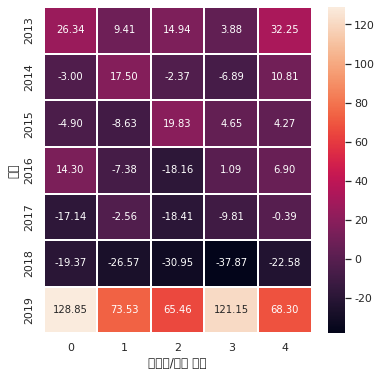

In [ ]:
graph_data = data.groupby(['연도', '배당금/주가 그룹'])['수익률'].mean().unstack()
plt.figure(figsize = (6, 6))
sns.heatmap(graph_data, annot = True, fmt = ".2f", linewidth = 1)
plt.show()

### 동일 가중 교체 매매에 따른 수익 비교

In [ ]:
result = []
for year in range(2013, 2020):
    y_data = data.loc[data['연도'] == year]
    record = []
    for group in range(5):
        group_data = y_data.loc[data['배당금/주가 그룹'] == group]
        inve_per_stock = 10**8 / len(group_data)
        num_stock_list = inve_per_stock / group_data['현재_주가']
        ror_list = (group_data['미래_주가'] - group_data['현재_주가'] + group_data['미래_배당금']) / group_data['현재_주가'] * 100
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"])

Text(0.5, 0, '연도')

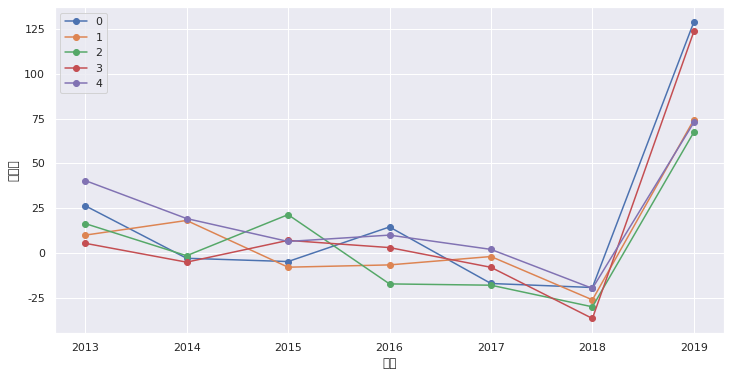

In [ ]:
plt.figure(figsize = (12, 6))
for group in range(5):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(7), range(2013, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [ ]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
0,7.0,18.00,51.53,-19.21,-10.85,-2.91,20.47,128.85
1,7.0,8.57,32.23,-26.09,-7.24,-1.94,14.08,74.34
2,7.0,5.53,33.12,-29.98,-17.56,-1.48,18.93,67.43
3,7.0,12.80,51.03,-36.48,-6.51,3.05,6.26,123.56
4,7.0,18.76,29.94,-19.70,4.26,10.00,29.84,72.83


# PER,ROA,ROE

### 환경 설정

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir("/content/drive/MyDrive/금융특화 계층별 AI역량강화 교안/실습1_5. 웹 크롤링과 금융 데이터/01.  재무제표 기반 투자 전략")

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

### 데이터 준비

In [ ]:
import pandas as pd
data = pd.read_csv(
                   "../데이터/재무제표_분석용데이터.csv",
                   encoding = "euc-kr",
                   usecols = ['기업', '연도', '현재_주가', '미래_주가', 'ROA', 'ROE', 'PER'],
                   )
data.dropna(inplace = True)

#### 산업군 추가

In [ ]:
stock_info_data = pd.read_csv(
    "../데이터/종목정보.txt", sep="\t", encoding="euc-kr", usecols=["Name", "Sector"]
)

data = pd.merge(data, stock_info_data, left_on="기업", right_on="Name", how="left")
data.drop(["Name"], axis=1, inplace=True)

In [ ]:
data['수익률'] = (data['미래_주가'] - data['현재_주가']) / data['현재_주가'] * 100

### 수익률과 투자 지표 간 상관관계 확인

#### PER

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


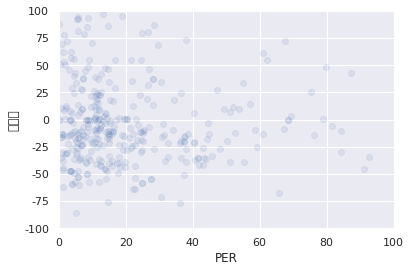

-0.09003184970756012


In [ ]:
plt.scatter(data["PER"], data["수익률"], alpha = 0.1)
plt.xlabel("PER")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.show()
print(data.corr("spearman").loc["PER", "수익률"])

#### ROA

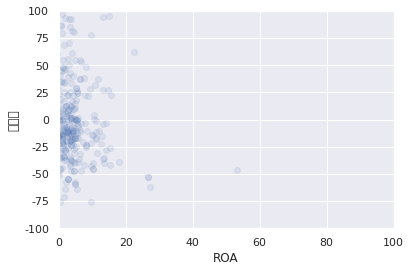

0.005251089191080683


In [ ]:
plt.scatter(data["ROA"], data["수익률"], alpha = 0.1)
plt.xlabel("ROA")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.show()
print(data.corr("spearman").loc["ROA", "수익률"])

#### ROE

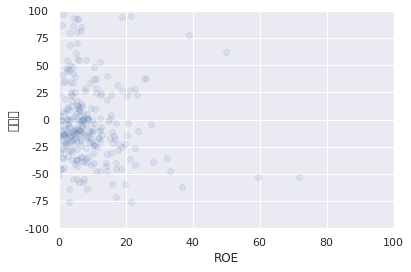

-0.004566457188120628


In [ ]:
plt.scatter(data["ROE"], data["수익률"], alpha = 0.1)
plt.xlabel("ROE")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.show()
print(data.corr("spearman").loc["ROE", "수익률"])

### 산업군을 고려한 수익률과 투자 지표 간 상관관계 확인

In [ ]:
display(data.drop_duplicates(['기업', 'Sector'])['Sector'].value_counts())

기타 금융업                              8
텔레비전 방송업                            4
전자부품 제조업                            3
자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업    3
특수 목적용 기계 제조업                       3
통신 및 방송 장비 제조업                      3
기타 정보 서비스업                          3
영화, 비디오물, 방송프로그램 제작 및 배급업           3
소프트웨어 개발 및 공급업                      2
상품 종합 도매업                           2
기계장비 및 관련 물품 도매업                    2
기타 화학제품 제조업                         2
1차 철강 제조업                           2
봉제의복 제조업                            2
영상 및 음향기기 제조업                       2
석유 정제품 제조업                          1
회사 본부 및 경영 컨설팅 서비스업                 1
기초 화학물질 제조업                         1
일반 목적용 기계 제조업                       1
기타 비금속 광물제품 제조업                     1
나무제품 제조업                            1
기타 운송관련 서비스업                        1
폐기물 처리업                             1
기록매체 복제업                            1
그외 기타 제품 제조업                        1
광고업                                 1
종합 소매업      

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


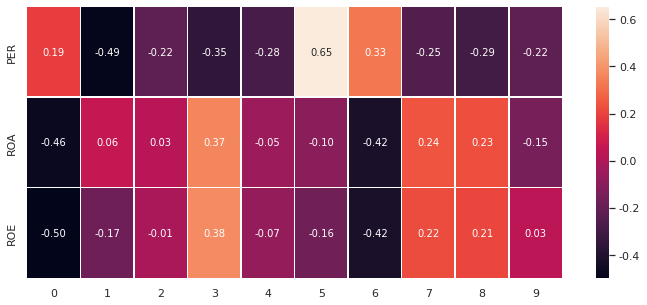

In [ ]:
result = []
top10_S = data.drop_duplicates(['기업', 'Sector'])['Sector'].value_counts().index[:10]
for col in ["PER", "ROA", "ROE"]:
    record = []
    for sector in top10_S:
        temp = data.loc[data['Sector'] == sector, [col, '수익률']].dropna()
        corr = temp.corr("spearman").iloc[0, 1]
        record.append(corr)
    result.append(record)

plt.figure(figsize = (12, 5))
sns.heatmap(result, annot=True, fmt=".2f", linewidths=0.5)
plt.yticks([0.5, 1.5, 2.5], ["PER", "ROA", "ROE"])
plt.show()

### 동일 가중 교체 매매에 따른 수익 비교

#### 전체 산업군

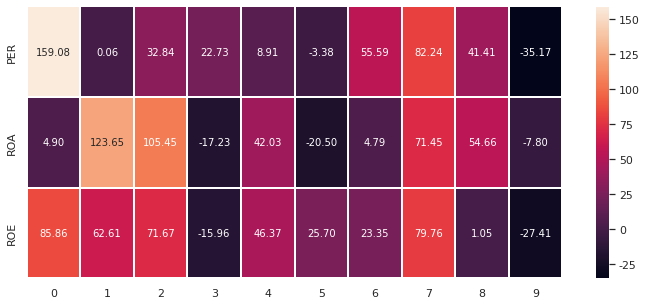

In [ ]:
import numpy as np
result = []
for col in ["PER", "ROA", "ROE"]:
    inve_list = np.array([10**8] * 10) # 투자금 초기화
    for year in range(2014, 2020):
        y_data = data.loc[data['연도'] == year]
        group_list = pd.qcut(y_data[col], 10, labels = range(10)).astype(int)
        for group in range(10):
            ror_list = y_data.loc[group_list == group, '수익률']
            inve_per_stock = inve_list[group] / len(ror_list)
            profit = (inve_per_stock * ror_list / 100).sum()
            inve_list[group] += profit
    profit_ratio_list = (inve_list - 10 ** 8) / 10 ** 8 * 100
    result.append(profit_ratio_list)
result = pd.DataFrame(result, columns = range(10), index = ["PER", "ROA", "ROE"])

plt.figure(figsize = (12, 5))
sns.heatmap(result, annot = True, linewidth = 1, fmt = ".2f")

#### 소프트웨어 개발 및 공급업

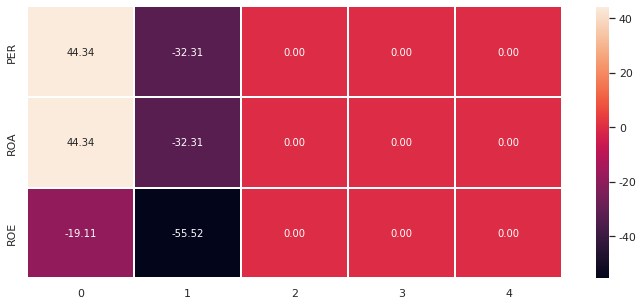

In [ ]:
s_data = data.loc[data['Sector'] == "소프트웨어 개발 및 공급업"] # 필터링
result = []
for col in ["PER", "ROA", "ROE"]:
    inve_list = np.array([10**8] * 5)
    for year in range(2014, 2020):
        try:
            y_data = s_data.loc[data['연도'] == year]
            group_list = pd.qcut(y_data[col], 2, labels = range(2)).astype(int)
            for group in range(2):
                ror_list = y_data.loc[group_list == group, '수익률']
                inve_per_stock = inve_list[group] / len(ror_list)
                profit = (inve_per_stock * ror_list / 100).sum()
                inve_list[group] += profit
        except:
            pass
    profit_ratio_list = (inve_list - 10 ** 8) / 10 ** 8 * 100
    result.append(profit_ratio_list)
result = pd.DataFrame(result, columns = range(5), index = ["PER", "ROA", "ROE"])

plt.figure(figsize = (12, 5))
sns.heatmap(result, annot = True, linewidth = 1, fmt = ".2f")